# CAN log analysis

Created by Tamás Márton KAZÁR, Zsombor PETHŐ and Afrifa Ebenezer<br>
5 May, 2023<br>
Guide for Automotive network and communication systems [BMEKOGGM709] IVN-LAB-2 Home submission

Simple frequency-based intrusion detection algorithm

The task is to perform offline analysis on CAN network traffic to identify an attack sequence.<br>
The following files will be available to you:
* `Idle.csv` - Log file containing CAN network traffic under normal operation
* `<NeptunCode>_Attack.csv` - Log file containing CAN network traffic during attack

This tutorial will guide you through analysing the `Idle.csv` file. 

This steps can be applied also for the  `<NeptunCode>_Attack.csv` log.

## Imports and initial setup

In this section you will see how to load a log file for data analysis in Python. <br>
First we need to import the modules we want to use: <br>
* [pathlib](https://docs.python.org/3.10/library/pathlib.html) - Built-in library for handling file paths.<br>
    The advantage of using pathlib is that it automatically handles OS specific adressing.<br>
    Eg.: `pathlib.Path.home()` evaluates to the user's home directory regardless of the OS: `'C:\Users\user'` on Windows, `'/home/user'` on Linux<br>
    We only need the `Path` class from the library
    
* [Pandas](https://pandas.pydata.org/docs/#) - Python package to load, manipulate, export and analyse data structures

Next we need to define the file path to the log file. In this tutorial we construct the file path from 2 components:
* `LOG_DIRECTORY` holds the <span style="color:red">**absolute path**</span> to the directory, where the log files are located.<br>
    **We assume, that the log files are located in the same directory as this Jupyter Notebook.** <br>
    In that case we can obtain the absolute path to the directory with the `Path.cwd()` method.<br>
    >If you have to place the log files in an other folder, please modify the code below according the following syntax:<br>
    >* on **Windows** file system: `CSV_DIRECTORY = Path(r'C:\path\to\your\folder\')`<br>
    >    Note that windows uses the backslash ('`\`') character in the filepath, which is also the strig-escape character in Python.<br>
    >    In order to avoid errors you need to use the raw representation of the string (acchieved by prefixing the string with an `r` character) or change every backslash to forward slash manually.
    >
    >* on **Linux** file system: `CSV_DIRECTORY = Path('/path/to/your/folder/')`<br>
    ><br>


* `LOG_FILE` holds the filename (with its extension) as a string literal eg.: `'Idle.csv'` 


The full filepath is constructed using the `.joinpath()` classmethod which concatenates its arguments in order at the end of the path object,  using the OS specific separator (`'\'` on Windows and `'/'` on Linux). The resulting path is stored in the `log_path` variable.

Run the cell below!

In [22]:
from pathlib import Path
import pandas as pd

# Absolute path to the current working directory (cwd)
LOG_DIRECTORY:Path = Path.cwd()

# Filename of the log file
LOG_FILE:str = 'Attack_log_files_for_students/B75P0E_Attack.csv'
# LOG_FILE:str = 'Idle.csv'     

# Construct the absolute file path to the csv file
log_path:Path = LOG_DIRECTORY.joinpath(LOG_FILE)

# Check that the specified path points to a file
if log_path.is_file():
    print(f'{log_path = }')
else:
    raise FileNotFoundError(log_path)

log_path = PosixPath('/Users/eben/Documents/Documents/Network/Attack_log_files_for_students/B75P0E_Attack.csv')


You should see the `log_path` variable printed above.
If you got an error, please double check the `LOG_DIRECTORY` and `LOG_FILE` variables!

## Reading the log file

The provided log files are in .csv format, so we can use Pandas's [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function to make a DataFrame object. The function takes the filepath as its argument, which we constructed in the previous cell. By convention the variable containing the initial dataframe is called `df` (short for dataframe).

We observe the strcture of the dataframe by calling the `.info()` method and showing the first and last 5 rows of the dataframe.

Run the cell below!

In [23]:
# Read csv file to dataframe
df:pd.DataFrame = pd.read_csv(log_path)

# Show information of the dataframe
print(df.info()) # Print column names with datatype and some additional info.
df # Prints the dataframe with HTML formatting. **This only works in Jupyter**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13360 entries, 0 to 13359
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      13360 non-null  object 
 1   ID        13360 non-null  int64  
 2   Extended  13360 non-null  int64  
 3   Name      12646 non-null  object 
 4   Data_1    13360 non-null  int64  
 5   Data_2    13360 non-null  int64  
 6   Data_3    13360 non-null  int64  
 7   Data_4    12850 non-null  float64
 8   Data_5    12850 non-null  float64
 9   Data_6    10614 non-null  float64
 10  Data_7    7907 non-null   float64
 11  Data_8    7856 non-null   float64
 12  Length    13360 non-null  int64  
 13  Signals   0 non-null      float64
 14  Error     13360 non-null  int64  
 15  Remote    13360 non-null  int64  
dtypes: float64(6), int64(8), object(2)
memory usage: 1.6+ MB
None


,Time,ID,Extended,Name,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8,Length,Signals,Error,Remote
0,0.078709 sec,840,0,Engine_States,80,43,43,50.0,14.0,3.0,NaN,NaN,6,NaN,0,0
1,0.080773 sec,520,0,Engine_States2,25,56,101,0.0,64.0,101.0,43.0,255.0,8,NaN,0,0
2,0.081551 sec,1160,0,Engine_Tempretures,125,87,0,36.0,0.0,255.0,48.0,54.0,8,NaN,0,0
3,0.084828 sec,909,0,ABS_msg,19,96,61,64.0,175.0,NaN,NaN,NaN,5,NaN,0,0
4,0.090694 sec,520,0,Engine_States2,25,56,101,0.0,64.0,101.0,43.0,255.0,8,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13355,51.133 sec,1101,0,ABS_msg3,19,105,19,106.0,19.0,106.0,0.0,0.0,8,NaN,0,0
13356,51.136 sec,840,0,Engine_States,80,43,43,50.0,14.0,3.0,NaN,NaN,6,NaN,0,0
13357,51.138 sec,520,0,Engine_States2,25,56,101,0.0,64.0,101.0,43.0,255.0,8,NaN,0,0
13358,51.14 sec,909,0,ABS_msg,19,96,88,203.0,175.0,NaN,NaN,NaN,5,NaN,0,0


## Data cleanup


### Data type conversion

As you can see above pandas trying to infer the datatype of the columns, but we can do better.

* The `'Time'` column is recognized as an object because it contains the `' sec'` suffix. We need to fix that later, but for now we can leave it as object.
* Any numerical column that has missing values is automatically treated as float, because by default Pandas use `NaN` to represent missing values, which is a float type. Pandas has built in [*nullable integer data types*](https://pandas.pydata.org/docs/reference/arrays.html?highlight=string#nullable-integer) that uses the `pandas.NA` as the missing value, but to use them, we have to explicitly state the conversion.
* For comptibility reasons Pandas always use the largest available datatype to store data, so int64 is the default for integer columns (with no missing value). It is not necessarily a problem to leave them like this, but if we can define a more suitable datatype we can reduce the memory usage and make our code faster which is especially beneficial when working with large datasets. For example:
    * The `'Extended'` column contains a 0 or 1 value depending on wether the message has an extended identifier. There is no point storing these values as int64, because we know for a fact, that it can only ever be 0 or 1, so a boolean datatype is sufficient. We still need to account for missing values, so we can use the `pd.BooleanDtype()`.
    * Also the databytes in the message are - as the name suggests - one byte long and contain the raw values, so they must be treated as unsigned. This means that instead of an int64 or float64 datatype an unsigned, 8 bit long integer type is sufficient, but we need to consider the missing values, so we will use the `pd.UInt8Dtype()` for these.

We can define the datatypes we want to use with the `.astype()` method and we need to provide a dictionary as the argument. The dictionary keys need to correpond to the column names in the dataframe, and the dictionary values should contain the datatype to be used of for specific column. We only need to inculde the columns in which we want to change the datatype. We will deal with the `'Time'` column later, so it will not be incuded in the conversion dictionary.

Run the cell below!

In [24]:
# Define data types for the columns in the csv files
CSV_COLUMN_TYPES:dict = {
    'ID': pd.UInt16Dtype(),      # 11-bit message identifier (16 bit is enough to store it)
    'Extended': pd.BooleanDtype(),  # Extended frame bit
    'Name': pd.StringDtype(),    # Message name (if known)
    'Data_1': pd.UInt8Dtype(),   # 1st data byte
    'Data_3': pd.UInt8Dtype(),   # 2nd data byte
    'Data_2': pd.UInt8Dtype(),   # 3rd data byte
    'Data_4': pd.UInt8Dtype(),   # 4th data byte
    'Data_5': pd.UInt8Dtype(),   # 5th data byte
    'Data_6': pd.UInt8Dtype(),   # 6th data byte
    'Data_7': pd.UInt8Dtype(),   # 7th data byte
    'Data_8': pd.UInt8Dtype(),   # 8th data byte
    'Length': pd.UInt8Dtype(),   # Data Length Code (DLC)
    'Signals': pd.StringDtype(), # Signals in message (if known)
    'Error': pd.BooleanDtype(),  # Error frame bit
    'Remote': pd.BooleanDtype()  # Remote frame bit
}

# Change datatypes of the dataframe
df = df.astype(CSV_COLUMN_TYPES)

# Show the results
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13360 entries, 0 to 13359
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      13360 non-null  object 
 1   ID        13360 non-null  UInt16 
 2   Extended  13360 non-null  boolean
 3   Name      12646 non-null  string 
 4   Data_1    13360 non-null  UInt8  
 5   Data_2    13360 non-null  UInt8  
 6   Data_3    13360 non-null  UInt8  
 7   Data_4    12850 non-null  UInt8  
 8   Data_5    12850 non-null  UInt8  
 9   Data_6    10614 non-null  UInt8  
 10  Data_7    7907 non-null   UInt8  
 11  Data_8    7856 non-null   UInt8  
 12  Length    13360 non-null  UInt8  
 13  Signals   0 non-null      string 
 14  Error     13360 non-null  boolean
 15  Remote    13360 non-null  boolean
dtypes: UInt16(1), UInt8(9), boolean(3), object(1), string(2)
memory usage: 665.5+ KB
None


,Time,ID,Extended,Name,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8,Length,Signals,Error,Remote
0,0.078709 sec,840,False,Engine_States,80,43,43,50,14,3,<NA>,<NA>,6,<NA>,False,False
1,0.080773 sec,520,False,Engine_States2,25,56,101,0,64,101,43,255,8,<NA>,False,False
2,0.081551 sec,1160,False,Engine_Tempretures,125,87,0,36,0,255,48,54,8,<NA>,False,False
3,0.084828 sec,909,False,ABS_msg,19,96,61,64,175,<NA>,<NA>,<NA>,5,<NA>,False,False
4,0.090694 sec,520,False,Engine_States2,25,56,101,0,64,101,43,255,8,<NA>,False,False


### Handling `'Time'` column

The `'Time'` column is recognized as an object because after the floating point time value it contains the `' sec'` suffix.<br>
To remove this we can use the `.removesuffix()` string method, but first we need to tell the interpreter, that we want to handle the object type as strings. For this, we need to use the `.str.removesuffix()` syntax and specify  the string we want to remove from the end as the argument. (in this case `' sec'`)<br>

This will leave only the floating point time values in the column, but the datatype will still be object. To actually convert them to floating point numbers, we need to call the `.astype()` method on the `'Time'` column and specify float as the datatype. This time we don't need a dictionary, since we are calling the `.astype()` method on a specific column, which can only have one datatype.

The result should look like this:

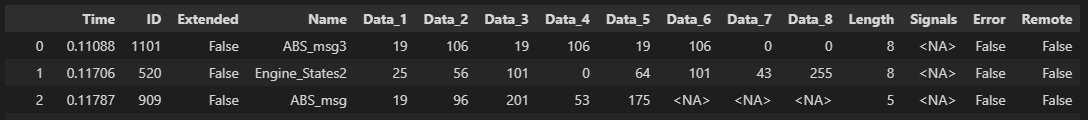

Implement your code in the cell below, and execute the cell

In [25]:
# Remove ' sec' from the Time column
df['Time'] = df['Time'].str.replace(' sec', '')

# Convert Time column to float
df['Time'] = df['Time'].astype(float)

# Show the results
df.head(10)

,Time,ID,Extended,Name,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8,Length,Signals,Error,Remote
0,0.078709,840,False,Engine_States,80,43,43,50,14,3,<NA>,<NA>,6,<NA>,False,False
1,0.080773,520,False,Engine_States2,25,56,101,0,64,101,43,255,8,<NA>,False,False
2,0.081551,1160,False,Engine_Tempretures,125,87,0,36,0,255,48,54,8,<NA>,False,False
3,0.084828,909,False,ABS_msg,19,96,61,64,175,<NA>,<NA>,<NA>,5,<NA>,False,False
4,0.090694,520,False,Engine_States2,25,56,101,0,64,101,43,255,8,<NA>,False,False
5,0.095281,1042,False,Brake_msg,0,0,0,0,255,120,0,255,8,<NA>,False,False
6,0.097649,840,False,Engine_States,80,43,43,50,14,3,<NA>,<NA>,6,<NA>,False,False
7,0.100580,520,False,Engine_States2,25,56,101,0,64,101,43,255,8,<NA>,False,False
8,0.110700,520,False,Engine_States2,25,56,101,0,64,101,43,255,8,<NA>,False,False
9,0.117750,840,False,Engine_States,80,43,43,50,14,3,<NA>,<NA>,6,<NA>,False,False


The dataframe is currently using a default integer index created by Pandas when we read in the data. Since the `'Time'` column now contains the correct numerical time data, we can convert our dataframe to use a time series index. 

>In Pandas every column is a [Series object](https://pandas.pydata.org/docs/reference/api/pandas.Series.html), which is a one-dimensional array with axis labels (including time series).

A time series index enables efficient time-based operations, such as slicing, resampling, and aggregating data based on specific time intervals. With a time series index, you can easily extract data for specific time ranges or perform calculations based on time intervals.

To use `'Time'` column as time series index, first we need to convert it to a `datetime` object series. For this we can use Pandas's built in `to_datetime()` function. This takes a single series as its argument, has has additional keyword arguments to control the conversion. Since the `'Time'` column now contains the elapsed time in seconds we will set the `units` keyword argument to seconds (`'s'`). We also need an origin for datetime conversion, which specifies a specific time and date of the 0 value in the series. Ususally the origin should be set to the exact date and time of the start of the measurement, but in our case, the origin does't really matter, so we will use the unix epoch for now, which is 1 January, 1970 00:00:00.00<br>
By setting the keyword arguments `unit='s', origin='unix'` Pandas will interpret the values in the `'Time'` column as seconds elapsed from unix epoch and calculate the datetime object for every record.

After the datetime conversion we can set the `'Time'` column as the index of the dataframe with the `.set_index()` method. We no lnger need the default integer index, so we will use the `drop=Ture` keyword argument to delete the original integer index.

The result should look like this:

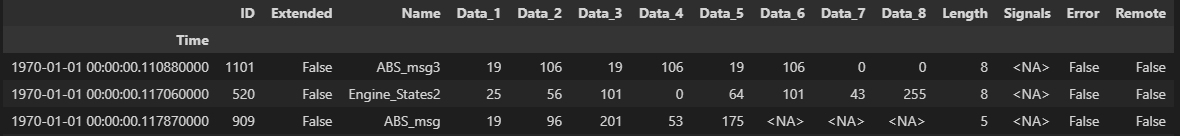

In [26]:
# ------------ IMPLEMENT YOUR CODE HERE ---------------
# Convert Time column to datetime object (needed later for resampling)
df['Time'] = pd.to_datetime(df['Time'], unit='s', origin='unix')

# Set Time as index and remove the default integer index
df = df.set_index('Time', drop=True)

#Show results
df.head(5)

,ID,Extended,Name,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8,Length,Signals,Error,Remote
Time,,,,,,,,,,,,,,,
1970-01-01 00:00:00.078709,840,False,Engine_States,80,43,43,50,14,3,<NA>,<NA>,6,<NA>,False,False
1970-01-01 00:00:00.080773,520,False,Engine_States2,25,56,101,0,64,101,43,255,8,<NA>,False,False
1970-01-01 00:00:00.081551,1160,False,Engine_Tempretures,125,87,0,36,0,255,48,54,8,<NA>,False,False
1970-01-01 00:00:00.084828,909,False,ABS_msg,19,96,61,64,175,<NA>,<NA>,<NA>,5,<NA>,False,False
1970-01-01 00:00:00.090694,520,False,Engine_States2,25,56,101,0,64,101,43,255,8,<NA>,False,False


## Calculate the message frequencies

In order to calculate the frequency of one message, first we need to filter our log to that specific message ID. To do this for every message ID we can utilise the `.groupby()` method and specify the `'ID'` column of the dataframe on which we want to perform the gruping. This creates a group for every uniqe value (message ID in this case) in the column, and stores information on which rows of the original dataframe belongs to that group. The result is a pandas [GroupBy object](https://pandas.pydata.org/docs/reference/groupby.html?highlight=dataframegroupby) (called `msg_groups` in the cell below).<br>

When iterating over a GropBy object every iteration yields a two-element tuple. The first element in the tuple is the group name, the second element is a slice of the original dataframe, containing only the rows that belong to that specific group. In our case, the name of the groups are the individual message ID-s, and the corresponding dataframe slice (called `group_df`) contains all the messages with that specific mesage ID.

To calculate the frequencies we need to count the number of messages in every 1 second time interval. We can use the `.resample()` method and specify 1 second (`'1S'`) as the sampling interval. We also need to specify how the original data should be aggregated when resampling. For counting the messages, we can use the `.count()` method chained after the resampling. There is no point to apply this on all columns of the dataframe slice, we will only use the `'ID'` column. It is important however that we choose a column that does not contain missing values, since `.count()` will only count the non-missing values in a sampling interval.<br>

This results in a time-indexed series, where the index starts from 0 time and counts up with 1 second steps and the values correspond to the number of received messages in the 1 second interval, starting from the index time.

To store the resulting series in for every message ID we create an empty dataframe (`msg_frequency_df`) before iterating over the GroupBy object. In every iteration, we add a new column to this dataframe. The name of the new column will be the message ID, and the column's data will be the calculated frequency series. Since we use the same resampling interval for every group, the resulting frequency series's indexes will allign with each other. This means that the newly created dataframe will inherit the same time series index as the individual frequency serieses.

The result should look like this:

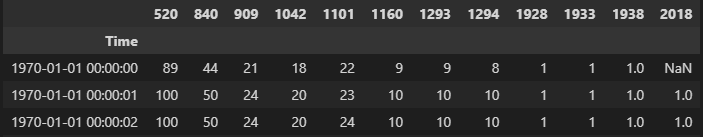

Your task is to implement:
* The grouping
* The frequency series calculation in the for cycle.

In [27]:
# ------------ IMPLEMENT YOUR CODE HERE ---------------
# Group the DataFrame by message ID
msg_groups = df.groupby('ID')

# Initialize a dataframe that will hold a time series for every message in the file 
msg_frequency_df = pd.DataFrame()

# Iterate over the messages and calculate the frequency in every sample interval
for (msg_ID, group_df) in msg_groups:
    frequency_series = group_df['ID'].resample('1S').count()
    msg_frequency_df[msg_ID] = frequency_series

# Show the results
msg_frequency_df.head(5)

,520,840,909,1042,1101,1160,1293,1294,1928,1933,1938,2018
Time,,,,,,,,,,,,
1970-01-01 00:00:00,92,47,22,19,21,10,9,9,1.0,1.0,1.0,1.0
1970-01-01 00:00:01,100,50,24,20,24,10,10,10,1.0,1.0,1.0,1.0
1970-01-01 00:00:02,100,50,24,20,24,10,10,10,1.0,1.0,1.0,1.0
1970-01-01 00:00:03,100,50,24,20,24,10,11,10,1.0,1.0,1.0,1.0
1970-01-01 00:00:04,100,50,23,20,24,10,10,10,1.0,1.0,1.0,1.0


## Visualization

You can visualize your results by calling `.plot()` on the new dataframe. This will make a plot with the index of the dataframe on the x axis and the columns of the dataframe on the y axis. Each column gets it's own line plot.

<Axes: xlabel='Time'>

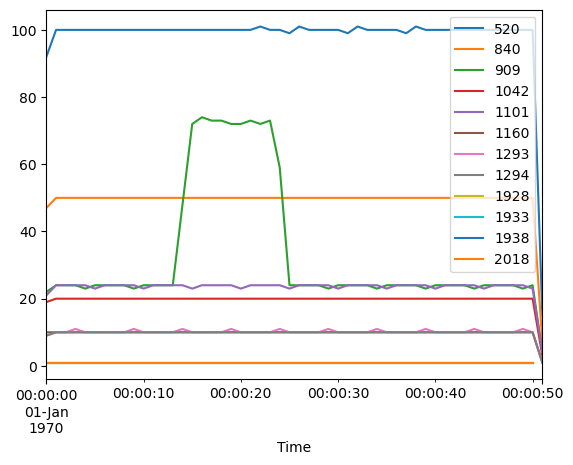

In [28]:
msg_frequency_df.plot()